# Homework 01 

This Jupyter Notebook file is a template that we provide for the homework.
You _must_ use this template and follow the instructions.
To unify the submission, we require you to store specific intermediate results into _"submission-variables"_.
These values are printed at the _end_ of the jupyter notebook and will be (partially) used to grade your assignment.
Please ensure that these variables have the correct values and aren't overwritten by following code-cells.

In [1]:
# used for submission variables
from copy import deepcopy
import numpy as np
import geopandas
from pathlib import Path

import osmnx

from sentinelsat import SentinelAPI
from datetime import date

from shapely.geometry import Point
import rasterio
import zipfile

from enum import Enum
from typing import List, Sequence
import matplotlib.pyplot as plt

import rasterio.mask

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/ip4rs/share/proj failed


## Sentinel-2 tile download

Download a Sentinel-2 tile from [SciHub Copernicus](https://scihub.copernicus.eu/dhus/#/home) with the following requirements:
- With the sensing date _after_ 01.03.2022
- With the product-type `S2MSI2A`
- _At least_ a cloud cover percentage of 1% but _no more_ than 20%
- Not the tile with the id: 
    - `6e5ad1c9-fc0e-4b93-9b5c-d0d401673206`

_Write_ down (inside of a markdown cell) a city that is part of the downloaded Sentinel-2 tile!

To ensure that no secrets are shared, please use the following code template.
You can create a [TOML](https://en.wikipedia.org/wiki/TOML) file called `.secrets.toml` with the contents:

```toml

scihub_copernicus_user = "<YOUR_PWD>"
scihub_copernicus_pwd = "<YOUR_PWD>"
```

Or you can simply remove your username/password _after_ executing the notebook and _before_ submitting it.

In [2]:
# KEEP
from dynaconf import Dynaconf

settings = Dynaconf(
    envvar_prefix="IP4RS",
    settings_files=["settings.toml", ".secrets.toml"],
)

SENTINEL_API_URL = "https://scihub.copernicus.eu/dhus"
YOUR_USERNAME = "stahir01"
YOUR_PWD = "CitySchool@0"
user = settings.get("scihub_copernicus_user", default=YOUR_USERNAME)
pwd = settings.get("scihub_copernicus_pwd", default=YOUR_PWD)
assert user != r""
assert pwd != r""
###

In [3]:
api = SentinelAPI(user, pwd, SENTINEL_API_URL)

In [4]:
#Since downloading all files takes a lot of time so we take a specific location so we can filter the results
#Select Sanssouci Palace as the location
lat = 52.4042
long = 13.0385

location = geopandas.GeoSeries([Point(long, lat)], crs="EPSG:4326")
location = location.to_wkt()[0]
location

'POINT (13.0385 52.4042)'

In [5]:
# Add here the code to select and download the tile

# The tile-id should be generated here
# for example:
start_date = date(year=2022, month=3, day=2)
end_date = date(year=2022, month=5, day=27)
satellite = "Sentinel-2"
product_type = "S2MSI2A"
tile_id = "6e5ad1c9-fc0e-4b93-9b5c-d0d401673206"


tile_results = api.query(location,
                         date=(start_date,end_date), 
                         platformname=satellite, 
                         producttype=product_type,
                         cloudcoverpercentage=(1,20))



#api.download_all(tile_results)
products_df = api.to_geodataframe(tile_results)
assert not products_df.empty
products_df



,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
365e1758-960c-42ef-a284-1c0b739a28d2,S2A_MSIL2A_20220518T100601_N0400_R022_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-18T10:06:01.024Z, Instrument: MS...",false,2022-05-18 16:28:16,2022-05-18 10:06:01.024,2022-05-18 10:06:01.024,2022-05-18 18:24:30.654,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20220518T162816_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20220518T162816_A0360...,S2A_MSIL2A_20220518T100601_N0400_R022_T33UUU_2...,365e1758-960c-42ef-a284-1c0b739a28d2,"MULTIPOLYGON (((12.36233 52.23145, 13.67854 52..."
c9fab88d-ac41-4882-baf6-9333982cca29,S2A_MSIL2A_20220518T100601_N0400_R022_T32UQD_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-18T10:06:01.024Z, Instrument: MS...",false,2022-05-18 16:28:16,2022-05-18 10:06:01.024,2022-05-18 10:06:01.024,2022-05-18 18:19:07.541,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20220518T162816_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20220518T162816_A0360...,S2A_MSIL2A_20220518T100601_N0400_R022_T32UQD_2...,c9fab88d-ac41-4882-baf6-9333982cca29,"MULTIPOLYGON (((13.53103 52.17548, 13.63418 53..."
aa06fd73-3af8-4a35-bc1e-63f50e5fc106,S2A_MSIL2A_20220508T100601_N0400_R022_T32UQD_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-08T10:06:01.024Z, Instrument: MS...",false,2022-05-08 17:38:19,2022-05-08 10:06:01.024,2022-05-08 10:06:01.024,2022-05-08 19:36:13.052,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20220508T173819_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20220508T173819_A0359...,S2A_MSIL2A_20220508T100601_N0400_R022_T32UQD_2...,aa06fd73-3af8-4a35-bc1e-63f50e5fc106,"MULTIPOLYGON (((13.53103 52.17548, 13.63418 53..."
a19251bd-6e0a-4ae5-a1d1-749ff966adea,S2A_MSIL2A_20220508T100601_N0400_R022_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-08T10:06:01.024Z, Instrument: MS...",false,2022-05-08 17:38:19,2022-05-08 10:06:01.024,2022-05-08 10:06:01.024,2022-05-08 19:29:22.527,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20220508T173819_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20220508T173819_A0359...,S2A_MSIL2A_20220508T100601_N0400_R022_T33UUU_2...,a19251bd-6e0a-4ae5-a1d1-749ff966adea,"MULTIPOLYGON (((12.36470 52.23149, 13.67854 52..."
53f211a7-42d5-4a67-8fd6-69d70308a85a,S2B_MSIL2A_20220423T100549_N0400_R022_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-23T10:05:49.024Z, Instrument: MS...",false,2022-04-23 13:43:29,2022-04-23 10:05:49.024,2022-04-23 10:05:49.024,2022-04-23 17:46:09.092,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS2_20220423T134329_S2022...,S2B_OPER_MSI_L2A_TL_VGS2_20220423T134329_A0267...,S2B_MSIL2A_20220423T100549_N0400_R022_T33UUU_2...,53f211a7-42d5-4a67-8fd6-69d70308a85a,"MULTIPOLYGON (((12.35500 52.23131, 13.67854 52..."
e681985a-dc3a-40fc-8406-2f122913dc45,S2B_MSIL2A_20220423T100549_N0400_R022_T32UQD_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-23T10:05:49.024Z, Instrument: MS...",false,2022-04-23 13:43:29,2022-04-23 10:05:49.

In [6]:

#We select the following tile
products_df = products_df.head(1)
products_df


#We used to find the link for the file of the tile we're using. So we can find the link for the tile and use it download the zip file for the tile
print(products_df.to_string()) 



                                                                                             title                                                                                                link                                                                              link_alternative                                                                                                                 link_icon                                                                                  summary ondemand      generationdate           beginposition             endposition           ingestiondate  orbitnumber  relativeorbitnumber  illuminationazimuthangle  illuminationzenithangle  vegetationpercentage  notvegetatedpercentage  waterpercentage  unclassifiedpercentage  mediumprobacloudspercentage  highprobacloudspercentage  snowicepercentage  cloudcoverpercentage                                            level1cpdiidentifier format processingbaseline platformname                        

In [6]:
#Now we download the datafame of the tile

#Directory created 
new_dir = Path("./Hw1_tile")
new_dir.mkdir(exist_ok=True)


from simple_downloader import download
tile_location = "https://tubcloud.tu-berlin.de/s/w3SqWygN5eiAM92/download/S2A_MSIL2A_20220518T100601_N0400_R022_T33UUU_20220518T162816.zip"
tile_id = download(tile_location,"./Hw1_tile/")




Target file already exists!
Will skip download. To force download set `force=True`


In [7]:
### DO NOT EDIT
submission_tile_id = deepcopy(tile_id)
##

## Valid sub-region

From the previously downloaded tile, extract a _valid_ subregion.
Convert the subregion to a `uint8` array without dropping important information (i.e., not simply calling `np.uint8` on the input).

In [8]:
### Add here the code to select a valid subregion
# 1) We select a sub region
# 2) We convert it into unit 8

#We need to first extract the zipfile

from zipfile import ZipFile
zipf = zipfile.ZipFile(submission_tile_id)
zipf.extractall(path="Hw1_tile")




In [9]:
hw1_extracted = submission_tile_id.with_suffix(".SAFE")
assert hw1_extracted.exists()

In [10]:
#Accessing multi-dimensional array images

class Band(str, Enum):
 

    B01 = "B01"
    B02 = "B02"
    B03 = "B03"
    B04 = "B04"
    B05 = "B05"
    B06 = "B06"
    B07 = "B07"
    B08 = "B08"
    B8A = "B8A"
    B09 = "B09"
    B10 = "B10"
    B11 = "B11"
    B12 = "B12"

    def __str__(self):
        return self.value

#Read the images
def read_s2_jp2_data(jp2_data_path: Path) -> np.ndarray:
    
    with rasterio.open(jp2_data_path) as data:
        # rasterio is 1-indexed
        return data.read(1)


def _get_all_jp2_files(source_dir: Path, parent_dir: str = "IMG_DATA/R60m") -> List[Path]:
    """
    Given a Sentinel-2 source directory, find all jp2 files that have
    a parent folder named `parent_dir`.
    Usually, it should be the folder `IMG_DATA`, other possible source
    would be the quality masks in `QI_DATA`.
    To not load band multiple times at different resolutions, by default
    the lowest 60m band is loaded.

    Note: Depending on the acquisition date and data type, the structure might be different
    and no sub-directory within `IMG_DATA` exists!
    """
    image_files = list(source_dir.glob(f"**/{parent_dir}/*.jp2"))
    assert len(image_files) > 0
    return image_files


class S2_TileReader:
    def __init__(self, safe_directory: Path, img_data_parent_dir: str = "IMG_DATA/R60m"):
        self.image_files = _get_all_jp2_files(safe_directory, parent_dir=img_data_parent_dir)

    def _get_band_path(self, band: Band) -> Path:
        return [f for f in self.image_files if f"_{band}_" in f.name][0]

    def read_band_data(self, band: Band) -> np.ndarray:
        band_path = self._get_band_path(band)
        return read_s2_jp2_data(band_path)
    


[[   0    0    0 ... 4058 4034 3913]
 [   0    0    0 ... 4256 3730 3673]
 [   0    0    0 ... 4634 3774 3563]
 ...
 [   0    0    0 ... 3062 3072 3067]
 [   0    0    0 ... 3081 3005 2988]
 [   0    0    0 ... 3050 3040 3073]]
(1830, 1830)


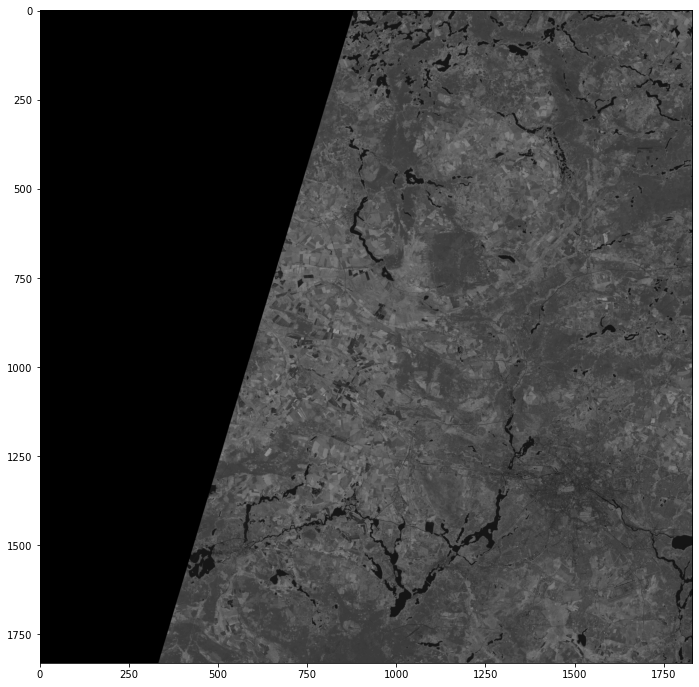

In [11]:
#Visualize a region,

#image_read = S2_TileReader(hw1_extracted)
#Band_B05_data = image_read.read_band_data(Band.B05)

tile_reader = S2_TileReader(hw1_extracted)
band05_data = tile_reader.read_band_data(Band.B8A)
plt.figure(figsize=(12, 12))
plt.imshow(band05_data, cmap ='gray')
print(band05_data)
print(band05_data.shape)

[[0.         0.         0.         ... 0.29463443 0.29289189 0.28410659]
 [0.         0.         0.         ... 0.30901038 0.27081972 0.26668119]
 [0.         0.         0.         ... 0.33645538 0.27401438 0.25869455]
 ...
 [0.         0.         0.         ... 0.22231903 0.22304509 0.22268206]
 [0.         0.         0.         ... 0.22369854 0.2181805  0.2169462 ]
 [0.         0.         0.         ... 0.22144776 0.2207217  0.22311769]]
(1830, 1830)


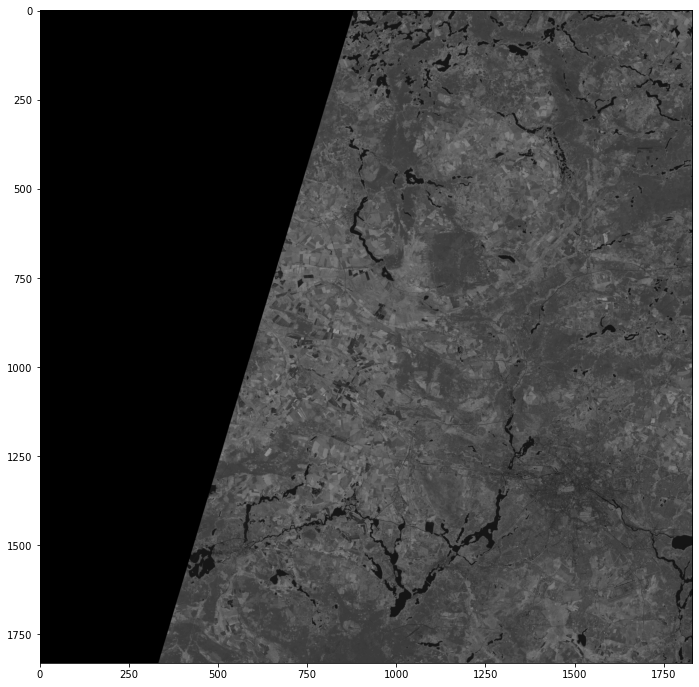

In [12]:
#Normalize the image.

def normalized_data(data):
    if np.any(data) < 0:
        return 0
    elif np.any(data) > 1:
        return 1
    else:
        return (data - np.min(data)) / (np.max(data) - np.min(data))
    
norm_band05 = normalized_data(band05_data)
print(norm_band05)
print(norm_band05.shape)
plt.figure(figsize=(12, 12))
plt.imshow(norm_band05, cmap ='gray')
    

[[3377 3193 3473 ... 3548 3574 3535]
 [3257 3379 3797 ... 3678 3622 3615]
 [3108 3262 3165 ... 3680 3686 3637]
 ...
 [3426 3493 3300 ... 3062 3072 3067]
 [3341 3403 3267 ... 3081 3005 2988]
 [3279 3245 3307 ... 3050 3040 3073]]
(400, 400)


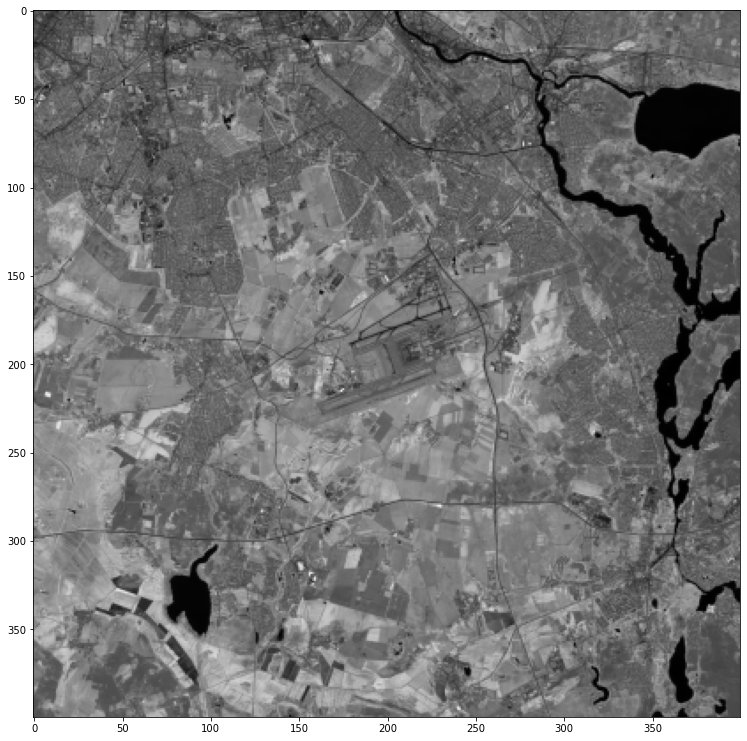

In [13]:
#Select a region of an image. We use the original image and not the normalized one.

# Reason: Because we will normalize the array when we convert to unit8. Hence, the above normalization part can just be taken for understanding



#Select a region of an image. We use the original image and not the normalized one
from PIL import Image

sub_region = band05_data[-400:, -400:]
plt.figure(figsize=(13, 13))
plt.imshow(sub_region, cmap = "gray")
print(sub_region)
print(sub_region.shape)




In [14]:
#convert it into unit8.
def convert_unit8(img):
    norm_img = (img + 1_000) / 10_000
    # Normalize image between 0 & 1
    norm_img = np.clip(norm_img, 0.0, 1.0)
    unit8 = np.uint8(norm_img * 255)
    return unit8
    
    
subregion_uint8 = convert_unit8(sub_region)
print(subregion_uint8)
print(subregion_uint8.shape)




[[111 106 114 ... 115 116 115]
 [108 111 122 ... 119 117 117]
 [104 108 106 ... 119 119 118]
 ...
 [112 114 109 ... 103 103 103]
 [110 112 108 ... 104 102 101]
 [109 108 109 ... 103 103 103]]
(400, 400)


In [15]:
### DO NOT EDIT
submission_subregion_uint8 = deepcopy(subregion_uint8)
###

### Visualize the valid sub-region

Visualize a _single band_ from the valid subregion _without_ applying any explicit or implicit normalization strategy.
The input array passed to `plt.imshow` has to be in the range `[0, 255]`. This range should also be reflected in the `vmin/vmax` parameters.

In [16]:
# For this section we use the algorithm provided to us to visualize a single band


multi_band = np.stack(
    [tile_reader.read_band_data(b) for b in (Band.B05, Band.B06, Band.B02)],
    axis=-1,
)
#print(single_band, single_band.shape)


#We select the subregion
multi_band_sregion = multi_band[-400:, -400:]


#Select the single band
single_band = multi_band_sregion[:,:, 2]
#print(single_band, single_band .shape)
#plt.figure(figsize=(13, 13))
#plt.imshow(single_band, cmap = "YlGn")




#Convert to unit8
single_band_unit8 = convert_unit8(single_band)
print(single_band_unit8, single_band_unit8.shape)









[[65 66 69 ... 57 57 57]
 [64 65 65 ... 57 57 57]
 [68 64 66 ... 58 58 58]
 ...
 [60 60 60 ... 58 58 58]
 [60 60 60 ... 58 58 58]
 [60 59 60 ... 58 58 59]] (400, 400)


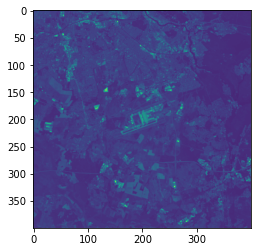

In [17]:
def contrast_adjusement(data, fmin, fmax):
    contrast_image = 255 * ((data - fmin) / (fmax - fmin))
    return contrast_image


single_band_contrast = contrast_adjusement(single_band_unit8, 40, 170)
single_band_contrast.min(), single_band_contrast.max()


asingle_band_contrast = np.clip(single_band_contrast, 0, 255)
# convert it back to uint8
imshow_inp = np.uint8(single_band_contrast)
plt.imshow(imshow_inp)


In [18]:
# DO NOT EDIT
submission_imshow_inp = deepcopy(imshow_inp)
###

## Morphological operators & Thresholding

The goal of this section is to combine morphological operators with thresholding strategies to create a binary/output mask that can then be used to segment the region/object of interest.
You are _not_ required to perfectly segment the object of interest. It is sufficient if the visual results _indicate_ the object of interest.

You have to meet the following requirements:
- You are _not_ allowed to use simple rectangular structuring elements.
- The values of the output mask must either be 0 or 1
    - 0 is used to indicate the absence of the object
    - 1 is used to indicate the presence of the object

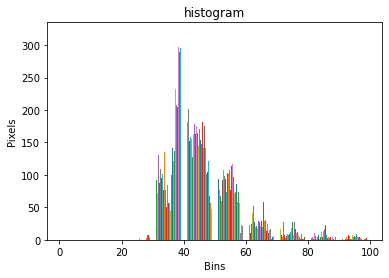

<Figure size 720x720 with 0 Axes>

In [22]:
# Add code here to apply morphological operators
# and thresholding strategy
# You are allowed to change/mix the order
from scipy import ndimage

#Image from previous aprt
org_img = submission_imshow_inp.copy()
#print(org_img, org_img.shape)
#plt.figure(figsize=(13,13))
#plt.imshow(org_img, cmap = "gray")



#plt.hist(org_img, bins = [0,20,40,60,80,100]) 
plt.hist(org_img, bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.title("histogram")
plt.xlabel("Bins")
plt.ylabel("Pixels")
plt.figure(figsize=(10,10))
plt.show()








#Opening
#kernel_rect = np.ones((3, 3))

#eroded_img = ndimage.grey_erosion(org_img, footprint=kernel_rect)
#print(eroded_img)
#plt.figure(figsize=(13,13))
#plt.imshow(eroded_img, cmap = "gray")

#opening_output = ndimage.grey_dilation(eroded_img, footprint=kernel_rect)
#plt.imshow(opening_output)
#print(opening_output)



#output_mask = ...

[[49 51 56 ... 33 33 33]
 [47 49 49 ... 33 33 33]
 [54 47 51 ... 35 35 35]
 ...
 [39 39 39 ... 35 35 35]
 [39 39 39 ... 35 35 35]
 [39 37 39 ... 35 35 37]]


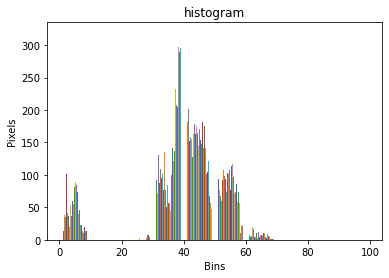

<Figure size 720x720 with 0 Axes>

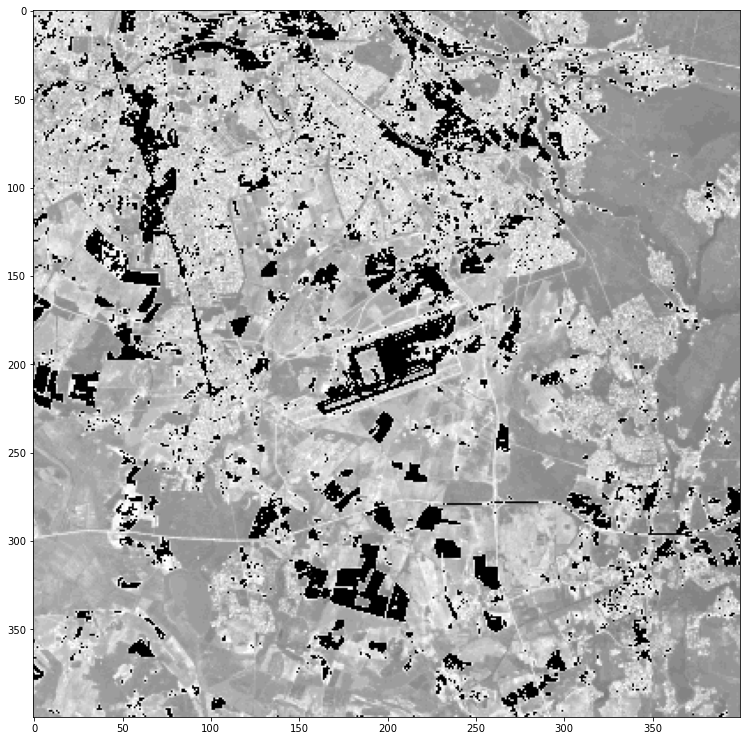

In [37]:
#for i in org_img:
 #   for j in i:
  #      print(j, end = " ")


threshold_img = np.where(org_img  > 60, 0, org_img)
print(org_img)
#for i in threshold_img:
#    for j in i:
#        print(j, end = " ") 
        
plt.hist(threshold_img, bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.title("histogram")
plt.xlabel("Bins")
plt.ylabel("Pixels")
plt.figure(figsize=(10,10))
plt.show()
plt.figure(figsize=(13,13))
plt.imshow(threshold_img, cmap="gray")


In [21]:
def threshold(data):
    if np.any(data) < 10:
        return 0
    elif np.any(data) > 80:
        return 0
    else:
        return data
threshold(org_img)
print(org_img)


[[49 51 56 ... 33 33 33]
 [47 49 49 ... 33 33 33]
 [54 47 51 ... 35 35 35]
 ...
 [39 39 39 ... 35 35 35]
 [39 39 39 ... 35 35 35]
 [39 37 39 ... 35 35 37]]


In [46]:
# Create threshold
#for i in org_img:
 #   for j in i:
  #      print(j, end = " ")



    
#        if data[i] < thres_val:
#            thres_arr[i] = 0
#        else:
#            thres_arr[i] = i
            
#    return thres_arr

#thres_img = threshold(org_img, 20)
#thres_img = org_img[org_img < 20] = 0
#print(thres_img)

            



    

    



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# DO NOT EDIT
submission_output_mask = deepcopy(output_mask)
###

To visually evaluate your result, use the output mask as an overlay for the RGB channels of the input array.
The colored output should be normalized to enhance the viewing experiment.
You can choose any _valid_ normalization strategy/method for the RGB channels.

In [ ]:
# Visualize the overlayed image

### Discussion

Discuss what you have learned when applying the morphological operators and thresholding strategies.
What didn't work? What issues did you have? What helped?
How did you decide to use the variables you have chosen?

It is not necessary to give an in-depth discussion about each value.
It should be clear, however, that you have tried different configurations and why you have decided on the current configuration.

Here you should write discussion:

## Submission

- Follow the instructions mentioned in this notebook.
- You are _not_ allowed to install other libraries.
    - The submitted jupyter notebook should be able to run as-is on paperspace and/or the provided Docker image.
- Explain the steps that went into the decision making of the specific values.
- It is essential that each homework should be done individually!
- The notebook should have been executed once before submitting it
    - The notebook should _not_ be _cleaned_ before submitting

Each student should submit the following materials to the ISIS system:
- One `zip` file containing the jupyter notebook named as: `IP4RS2022-HW1_<NAME_SURNAME>.zip`



### Submission variables

Please ensure that these variables are correct after you have restarted your notebook and executed all cells from top to bottom.
You are _not allowed_ to modify the following cells:

In [ ]:
import rich

rich.print(f"{submission_tile_id=}")
rich.print(f"{submission_subregion_uint8=}")
rich.print(f"{submission_output_mask=}")